Objetivo do projeto: Classificar se uma máquina precisa ou não de manutenção

In [1]:
#Importando as bibliotecas
import numpy as np # importa biblioteca numpy
from sklearn.model_selection import train_test_split  # importa biblioteca de teste e treino
from sklearn.tree import DecisionTreeClassifier # importa a arvore de decisão
from sklearn import tree # importa a função tree para plotar a arvore
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pandas as pd # importa a biblioteca pandas
import matplotlib.pyplot as plt # importa a matplotlib
import seaborn as sns  # importa a seabo

Criando a base de dados

In [2]:
# criando a base de dados
data = pd.DataFrame({
    'consumoEnergia':[1000,3000,1500,2500,1200,3500], #0=baixa,1=média,2=Alta
    'tempooperacao':[200,500,300,400,250,600], #0=baixa,1=média,2=Alta
    'tpEnergia':[1,2,1,2,1,2], #1=Elétrica,2=Gás
    'classif':['Eficiente','Ineficiente','Eficiente','Ineficiente','Eficiente','Ineficiente']
})

Divdir os dados em treino

Acuráncia: 1.0
Acuráncia: 1.0


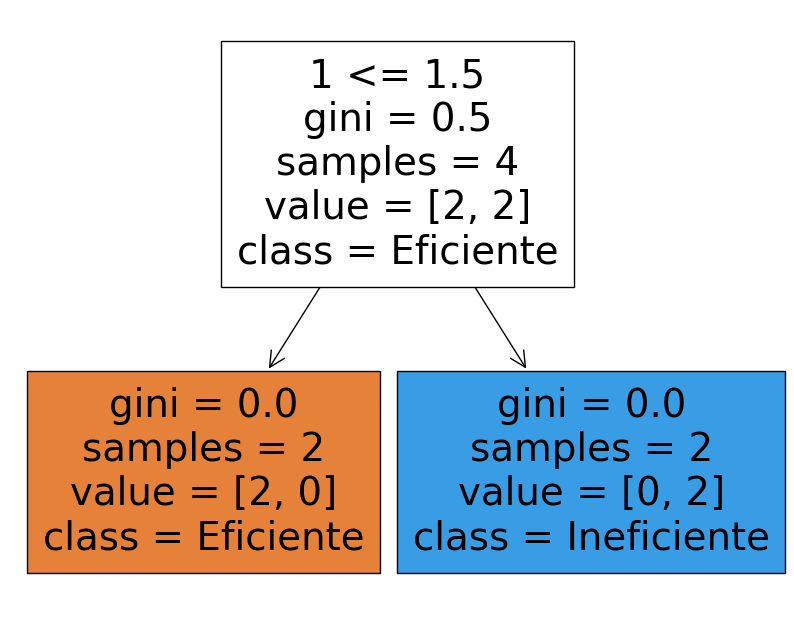

In [4]:
x=np.array(data['tpEnergia']) # pega a coluna de tempo do dataframe
y=np.array(data['classif']) # pega a coluna de classificação do dataframe 
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),y.reshape(-1,1),
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
precisao = precision_score(y_teste,prev,pos_label='Eficiente') #Pós label rótulo
matrix = confusion_matrix(y_teste,prev)
print(f'Acuráncia: {acurracy}')
print(f'Acuráncia: {precisao}')
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=x.tolist(),class_names=y.tolist(),filled=True)
plt.show()


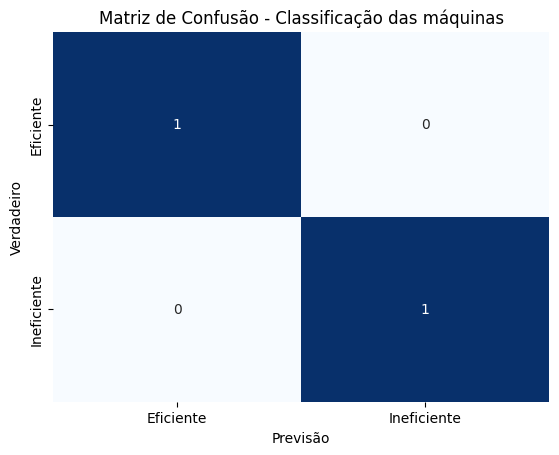

array([[1, 0],
       [0, 1]], dtype=int64)

In [5]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Eficiente','Ineficiente'],yticklabels=['Eficiente','Ineficiente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()
matrix